In [1]:
import feedparser
import os
import time
#from urlparse import urlparse
from boilerpipe.extract import Extractor

In [2]:
url="http://www.beritasatu.com/politik/463625-presiden-jokowi-dijadwalkan-buka-kongres-trisakti-gmni-di-manado.html"
extractor = Extractor(extractor='ArticleExtractor', url=url)
content = extractor.getText() 
content=content.lower()
#content
hasil=[]
from nltk.tokenize import sent_tokenize,word_tokenize

kata=sent_tokenize(content)
for i in kata:
    tokenize=word_tokenize(i)
    hasil.append(tokenize)
    #kata.append()
    

In [3]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(hasil, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['presiden'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=127, size=100, alpha=0.025)
['presiden', 'jokowi', 'dijadwalkan', 'buka', 'kongres', 'trisakti', 'gmni', 'di', 'manado', 'joko', 'widodo', '.', '(', 'foto', ':', 'antara', ')', 'novy', 'lumanauw', '/', 'cah', 'rabu', ',', '15', 'november', '2017', '|', '06:56', 'wib', '-', 'hari', 'membuka', 'ke-20', 'gerakan', 'mahasiswa', 'nasional', 'indonesia', 'kompleks', 'gubernuran\u200e', 'sulawesi', 'utara', 'bertema', '``', 'meneguhkan', 'masa', 'depan', 'berdasarkan', 'pancasila', 'era', 'asia', 'pasifik', "''", 'akan', 'diikuti', 'seluruh', 'koordinator', 'daerah', 'dan', 'cabang', 'dari', '34', 'provinsi', 'didampingi', 'ibu', 'negara', 'iriana', 'telah', 'berada', 'pasangan', 'orang', 'nomor', 'satu', 'republik', 'ini', 'tiba', 'pada', '15/11', 'dini', 'setelah', 'menempuh', 'perjalanan', 'manila', 'filipina', 'usai', 'menghadiri', 'ktt', 'asean', 'ke-31', 'pesawat', 'kepresidenan', 'indonesia-1', 'yang', 'membawa', 'beserta', 'rombongan', 'mendarat', 'bandara', 'internasio

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [7]:
model.wv.most_similar(u'presiden')

/usr/lib64/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('00.20', 0.3282608389854431),
 ('perjalanan', 0.31506234407424927),
 ('au', 0.2348509430885315),
 ("''", 0.17260156571865082),
 ('menghadiri', 0.17142567038536072),
 ('xx', 0.17036499083042145),
 ('olly', 0.163502037525177),
 ('petang', 0.16032180190086365),
 ('kepresidenan', 0.1507365107536316),
 ('rencananya', 0.14649003744125366)]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


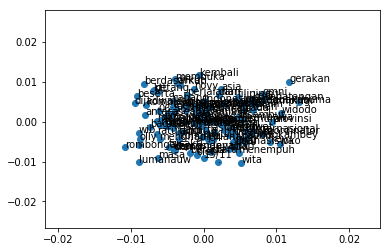

In [5]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
pca = PCA(n_components=15)
result = pca.fit_transform(X)
%matplotlib inline
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()